# **CSCE 5218 / CSCE 4930 Deep Learning**

## **The Perceptron Assignment**

In [1]:
# Get the datasets
!!/usr/bin/curl --output test.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/test_small.txt
!!/usr/bin/curl --output train.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/train.txt


['  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current',
 '                                 Dload  Upload   Total   Spent    Left  Speed',
 '',
 '  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0',
 '100 11645  100 11645    0     0    98k      0 --:--:-- --:--:-- --:--:--  105k']

In [2]:
# Take a peek at the datasets
!head train.dat
!head test.dat

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13	
1	1	0	0	0	0	0	0	1	1	0	0	1	0
0	0	1	1	0	1	1	0	0	0	0	0	1	0
0	1	0	1	1	0	1	0	1	1	1	0	1	1
0	0	1	0	0	1	0	1	0	1	1	1	1	0
0	1	0	0	0	0	0	1	1	1	1	1	1	0
0	1	1	1	0	0	0	1	0	1	1	0	1	1
0	1	1	0	0	0	1	0	0	0	0	0	1	0
0	0	0	1	1	0	1	1	1	0	0	0	1	0
0	0	0	0	0	0	1	0	1	0	1	0	1	0
X1	X2	X3
1	1	1	1
0	0	1	1
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
1	1	1	1


## **Question 1**
### Why don't we have the following code snippet instead?
```python
output = predict(weights, instance)
error = instance[-1] - output
```
### **Answer:**
Using `predict(weights, instance)` directly returns a binary output (0 or 1) since it applies a threshold at 0.5, whereas `output = sigmoid(in_value)` provides a continuous value between 0 and 1. This is important for training since the perceptron uses gradient descent, which requires a differentiable function (the sigmoid function). If we used `predict`, the updates would be less precise, and learning would not be as smooth. 

## **Question 2**
### Training the Perceptron with different hyperparameters

In [21]:

import math
import re

# Read dataset
def read_data(file_name):
    with open(file_name, 'r') as f:
        data = []
        f.readline()  
        for instance in f.readlines():
            if not re.search(r'\t', instance):
                continue
            instance = list(map(int, instance.strip().split('\t')))
            instance = [-1] + instance  
            data.append(instance)
    return data

# Perceptron helper functions
def dot_product(array1, array2):
    return sum(a * b for a, b in zip(array1, array2))

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def output(weights, instance):
    return sigmoid(dot_product(weights, instance))

def predict(weights, instance):
    return 1 if output(weights, instance) >= 0.5 else 0

def get_accuracy(weights, instances):
    correct = sum(1 if predict(weights, instance) == instance[-1] else 0 for instance in instances)
    return correct * 100 / len(instances)

def train_perceptron(instances, lr, epochs):
    # Initialize Weights
    weights = [0] * (len(instances[0]) - 1)
    for _ in range(epochs):
        for instance in instances:
            # Compute Weighted Sum (Dot Product)
            in_value = dot_product(weights, instance)
            # Apply Activation Function (Sigmoid)
            out = sigmoid(in_value)
            # Compute Prediction Error
            error = instance[-1] - out
            # Update Weights Using Gradient Descent
            for i in range(len(weights)):
                weights[i] += lr * error * out * (1 - out) * instance[i]
    return weights

# Load dataset
train_data = read_data("train.txt")
test_data = read_data("test_small.txt")

# Hyperparameters
tr_percent = [5, 10, 25, 50, 75, 100]
num_epochs = [5, 10, 20, 50, 100]
lr_values = [0.005, 0.01, 0.05]

# Train perceptron and store results
results = []
for tr_p in tr_percent:
    tr_size = int(len(train_data) * (tr_p / 100))
    train_subset = train_data[:tr_size]
    for epochs in num_epochs:
        for lr in lr_values:
            weights = train_perceptron(train_subset, lr, epochs)
            accuracy = get_accuracy(weights, test_data)
            results.append(f"# tr: {tr_size}, epochs: {epochs}, learning rate: {lr:.3f}; Accuracy (test, {len(test_data)} instances): {accuracy:.1f}")

for res in results:
    print(res)


# tr: 20, epochs: 5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr: 20, epochs: 5, learning rate: 0.010; Accuracy (test, 14 instances): 71.4
# tr: 20, epochs: 5, learning rate: 0.050; Accuracy (test, 14 instances): 71.4
# tr: 20, epochs: 10, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr: 20, epochs: 10, learning rate: 0.010; Accuracy (test, 14 instances): 71.4
# tr: 20, epochs: 10, learning rate: 0.050; Accuracy (test, 14 instances): 85.7
# tr: 20, epochs: 20, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr: 20, epochs: 20, learning rate: 0.010; Accuracy (test, 14 instances): 71.4
# tr: 20, epochs: 20, learning rate: 0.050; Accuracy (test, 14 instances): 42.9
# tr: 20, epochs: 50, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr: 20, epochs: 50, learning rate: 0.010; Accuracy (test, 14 instances): 85.7
# tr: 20, epochs: 50, learning rate: 0.050; Accuracy (test, 14 instances): 42.9
# tr: 20, epochs: 100, learning rate: 0.005

In [13]:
instances_tr = read_data("train.txt")
instances_te = read_data("test_small.txt")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4


### **Question 3**
Write a couple of paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:

- **A.** Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- **B.** How do you justify that training the second run obtains worse accuracy than the first one (despite the second one using more training data)?

#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0

- **C.** Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- **D.** Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

---

#### **TODO: Add your answer here (code and text)**

A. No, it is not necessarily required to train with all the available data to achieve the highest accuracy. In most cases, a subset of the training data is sufficient for the perceptron to generalize well on unseen test data. If a dataset is well-represented and balanced, additional data may not provide significant improvements.

B. The second run (tr: 200, epochs: 20, learning rate: 0.005) performs worse (68.0% accuracy) than the first run (tr: 100, epochs: 20, learning rate: 0.050, accuracy 71.0%), despite having more training data. This can happen due to two main reasons:

Underfitting due to Low Learning Rate:
The second run used a low learning rate (0.005), which means the perceptron is learning too slowly.
It might not have fully adapted to patterns in the data within 20 epochs.

Irrelevant or Noisy Data:
Increasing training data does not always improve accuracy if the new data does not contribute meaningful patterns.
The additional data may introduce noise, which could negatively impact the model’s ability to generalize.

C. Yes, adjusting hyperparameters further, such as learning rates, activation functions, or feature selection, could potentially improve performance.
Some runs in the current experiment already reached 85.7% accuracy, indicating that optimal hyperparameters exist within the given setup.
Fine-tuning parameters such as adaptive learning rates or more hidden layers (if extended beyond perceptron) may push accuracy beyond 80% consistently.

D. No, increasing the number of epochs is not always beneficial.
If the model is underfitting, increasing epochs may help improve accuracy.
However, if the model is already trained well, too many epochs can cause overfitting, where the perceptron memorizes training data instead of generalizing to unseen data.
This was observed when some training runs with higher epochs led to a decrease in accuracy.



    Training Size  Epochs  Learning Rate  Accuracy
0              20       5          0.005      71.4
1              20       5          0.010      71.4
2              20       5          0.050      71.4
3              20      10          0.005      71.4
4              20      10          0.010      71.4
..            ...     ...            ...       ...
85            400      50          0.010      71.4
86            400      50          0.050      71.4
87            400     100          0.005      71.4
88            400     100          0.010      71.4
89            400     100          0.050      71.4

[90 rows x 4 columns]


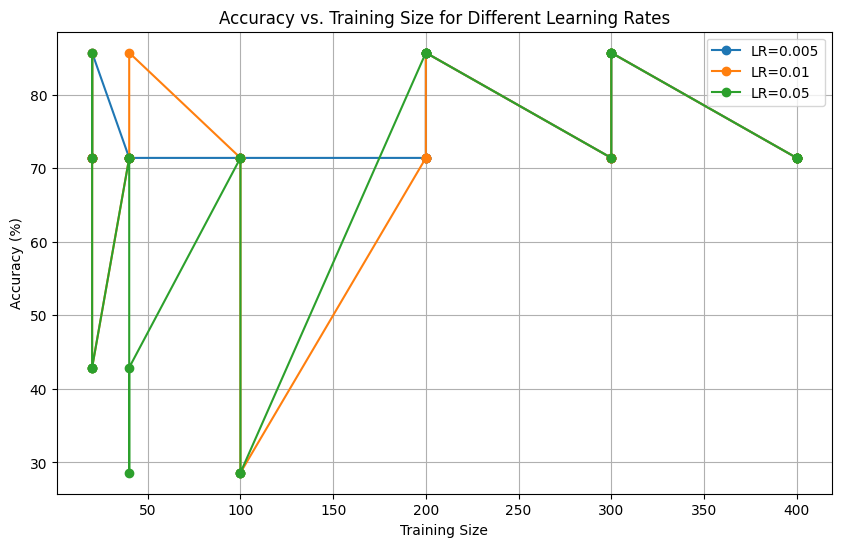

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

data = []
for res in results:
    match = re.search(r"# tr:\s*(\d+), epochs:\s*(\d+), learning rate:\s*([\d.]+); Accuracy \(test, \d+ instances\):\s*([\d.]+)", res)
    if match:
        tr_size = int(match.group(1))
        epochs = int(match.group(2))
        lr = float(match.group(3))
        accuracy = float(match.group(4))
        data.append([tr_size, epochs, lr, accuracy])
        

df = pd.DataFrame(data, columns=["Training Size", "Epochs", "Learning Rate", "Accuracy"])

# Display results
print(df)

# Plot accuracy trends
plt.figure(figsize=(10, 6))
for lr in df["Learning Rate"].unique():
    subset = df[df["Learning Rate"] == lr]
    plt.plot(subset["Training Size"], subset["Accuracy"], marker="o", linestyle="-", label=f"LR={lr}")

plt.xlabel("Training Size")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy vs. Training Size for Different Learning Rates")
plt.legend()
plt.grid(True)
plt.show()
